# Feature Extraction
This exercise will test my ability to accurately and efficiently extract features from a dataset. The dataset that will be used is the UCI mushroom dataset.

## Visualization of dataset
Due to the categorical nature of the dataset, only a limited amount of visualization can be done.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

agar_df = pd.read_csv('agaricus-lepiota.data')

# A summary of the data
agar_df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


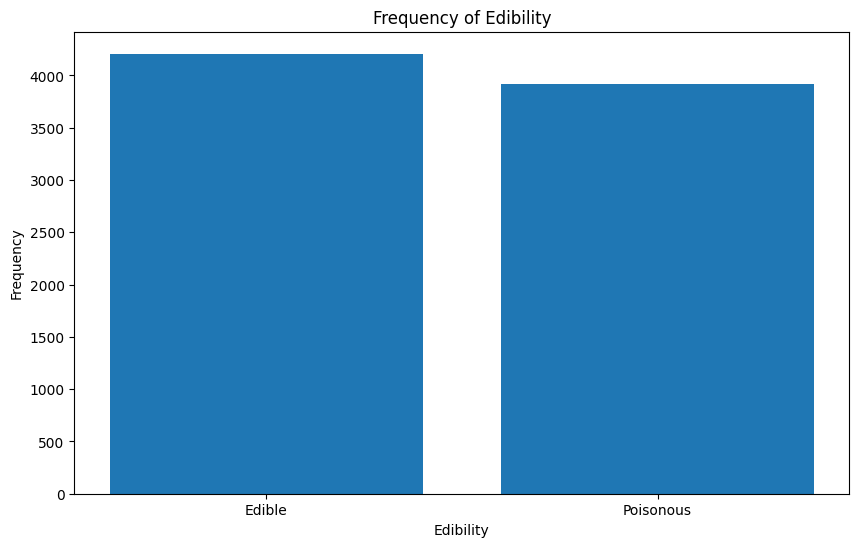

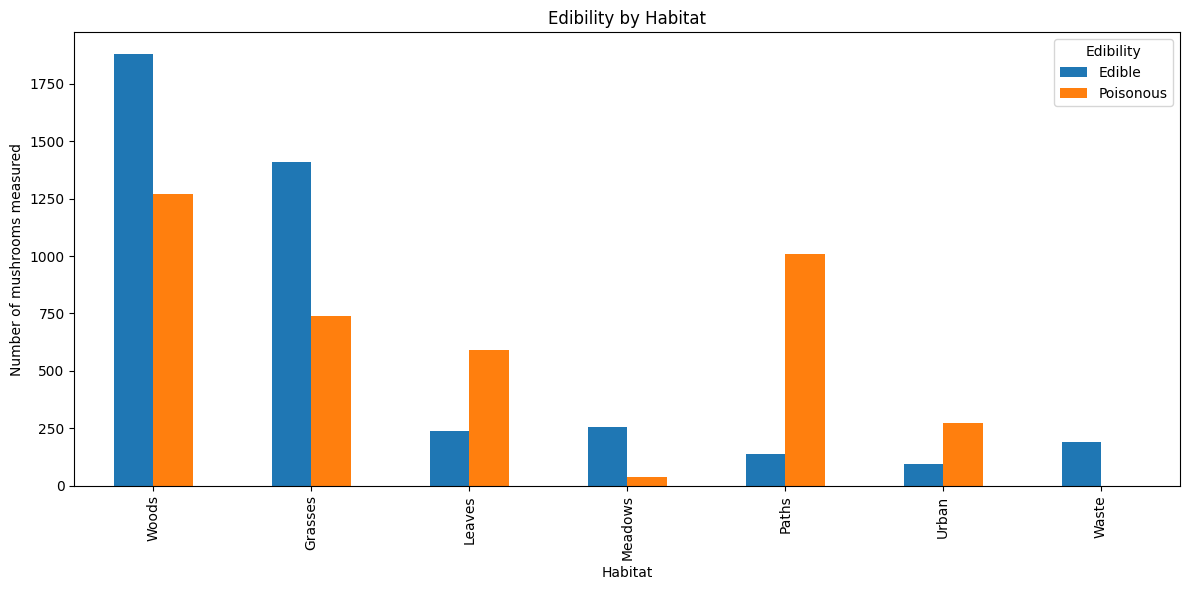

In [28]:
edibility_map = {
    'e' : 'Edible',
    'p' : 'Poisonous'
}

habitat_mapping = {
    'g' : 'Grasses',
    'l' : 'Leaves', 
    'm' : 'Meadows',
    'p' : 'Paths', 
    'u' : 'Urban', 
    'w' : 'Waste', 
    'd' : 'Woods'
}


plt.figure(figsize=(10, 6))


edibility_count = agar_df['edibility'].value_counts()
edibility_count.index = edibility_count.index.map(edibility_map)


plt.bar(edibility_count.index, edibility_count.values)

plt.xlabel('Edibility')
plt.ylabel('Frequency')
plt.title('Frequency of Edibility')

habitat_grouped = agar_df.groupby(['habitat', 'edibility']).size().unstack().fillna(0)



habitat_grouped.index = [habitat_mapping.get(label, label) for label in habitat_grouped.index]

ax = habitat_grouped.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.xlabel('Habitat')
plt.ylabel('Number of mushrooms measured')
plt.title('Edibility by Habitat')
plt.legend(title='Edibility', labels=[edibility_map.get(label, label) for label in habitat_grouped.columns])

plt.tight_layout()
plt.show()


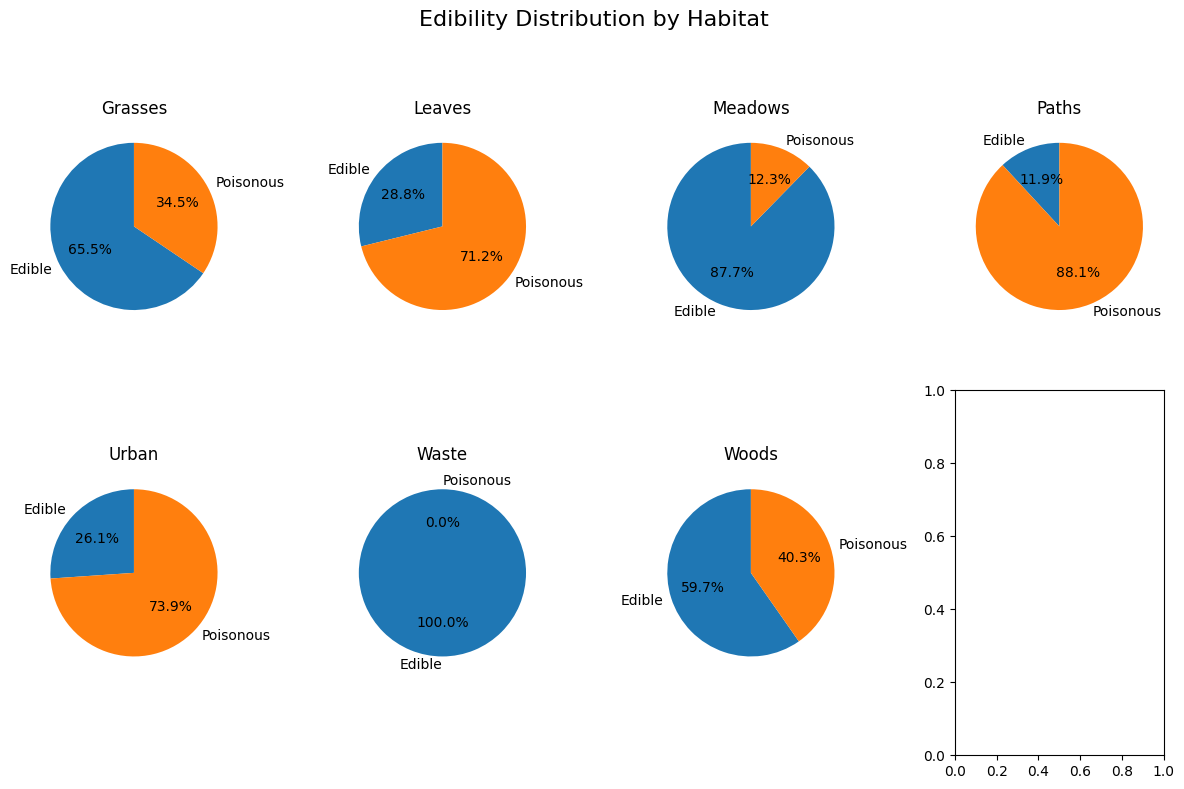

In [29]:
fig, axarr = plt.subplots(2, 4, figsize=(12, 8))
axarr = axarr.flatten()

for i, (habitat, data) in enumerate(habitat_grouped.groupby(level=0)):
    ax = axarr[i]
    labels = [edibility_map.get(label, label) for label in data.columns]
    sizes = data.sum(axis=0).values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(habitat)

plt.suptitle('Edibility Distribution by Habitat', fontsize=16)
plt.tight_layout()
plt.show()

# Categorical to Numerical Data
In order to properly analyze a dataset, it is crucial to turn categorical data into numerical data.

In [30]:
dummy_encoded_df = pd.get_dummies(agar_df, dtype=float)


<Axes: >

<Figure size 640x480 with 0 Axes>

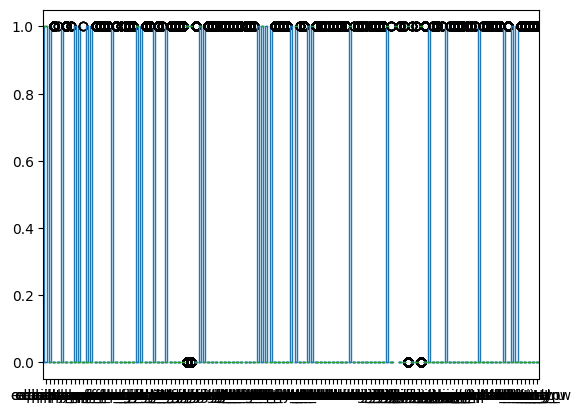

In [31]:
plt.figure()

# gill_color_dummy = 
dummy_encoded_df.plot.box()



In [32]:
# plt.figure()
# dummy_encoded_df.hist(color='k', alpha=0.5, bins=25)

In [33]:
# scatter_matrix = pd.plotting.scatter_matrix(dummy_encoded_df, figsize=(12, 12), marker='o')

# # Optional: Customize scatterplot appearance (e.g., add labels)
# plt.suptitle('Scatter Matrix')
# plt.tight_layout()
# plt.subplots_adjust(top=0.95)

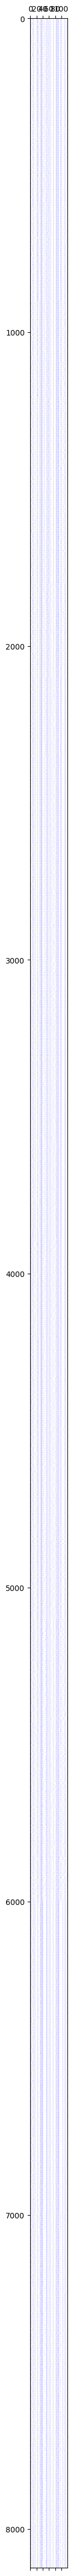

In [43]:
# alt.atheism
import numpy as np


# Plot document-term matrix, blue indicates non-zero value
plt.spy(dummy_encoded_df, markersize=0.01, marker='s', color='b')
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()

# plt.spy(vectors[indices][newsgroups.target[indices]==0], markersize=0.01)
# fig = plt.gcf()
# plt.plot()
# plt.show()

# # comp.graphics
# plt.spy(vectors[indices][newsgroups.target[indices]==1], markersize=0.01)
# fig = plt.gcf()
# fig.set_size_inches(60,60)
# plt.plot()
# plt.show()

# # talk.religion.misc
# plt.spy(vectors[indices][newsgroups.target[indices]==19], markersize=0.01)
# fig = plt.gcf()
# fig.set_size_inches(60,60)
# plt.plot()
# plt.show()

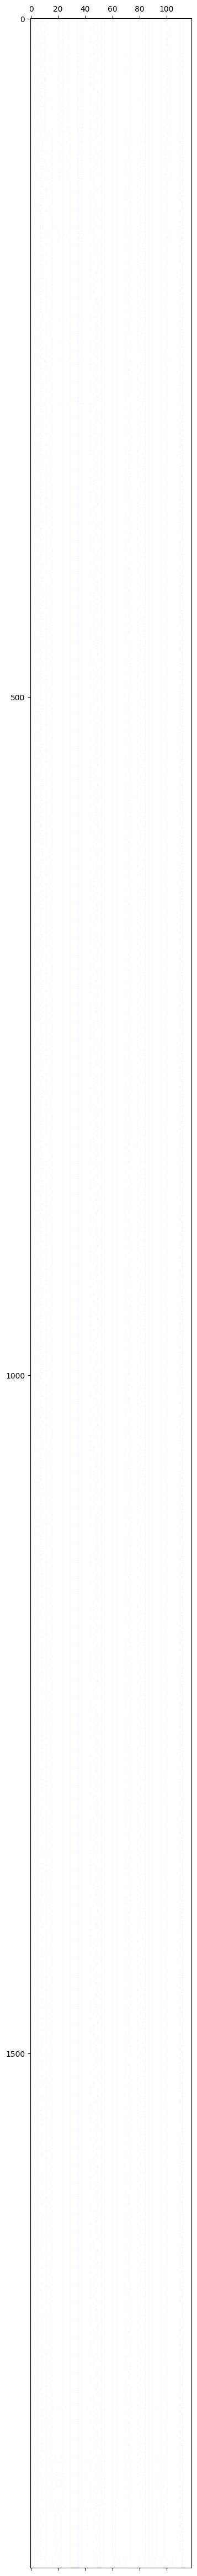

In [48]:
# Wood habitat and edible
plt.spy(dummy_encoded_df[:][(dummy_encoded_df['habitat_d'] == 1) & (dummy_encoded_df['edibility_e'] == 1)], markersize=0.01, marker='s', color='b')
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()